# Grammys Project
![](https://www.moviedebuts.com/wp-content/uploads/2021/05/ra_ga_logo.png)

Welcome to your first day as a business intelligence intern for The Recording Academy, the non-profit organization behind the Grammy Awards! You will be working with Katie, the Director of Business Intelligence, at The Recording Academy. 

You learned that back in 2022, Ray Starck, the VP of Digital Strategy, decided to split grammy.com into two websites. Grammy.com which focuses on the entertainment news side, e.g., the Grammy Awards and related content, and recordingacademy.com which specializes in cultivating the well-being and culture of the music community. 

When Harvey Mason Jr. stepped into his role as CEO of The Recording Academy he wanted to investigate the need for having two distinct websites over one main website for all visitors. 

Now it's up to you, as the business intelligence intern, to explore and analyze the data from both websites to understand the different groups of visitors on the site and their behavioral patterns. Your goal is to help the Business Intelligence team to give a recommendation to Harvey rooted in the data.

Should The Recording Academy merge the two websites or keep them separate to serve their, possibly distinct, user bases? 

In the tasks below, you will look through several files from both websites, aggregate, join, and more to answer this valuable business question!

Are you ready?!?!

Let's do this!

![](https://media.giphy.com/media/ZSK6UPKTSLZCKd7orz/giphy.gif)

## Data Dictionary
To start, you will be working with two files, `grammys_live_web_analytics.csv` and `ra_live_web_analytics.csv`. 

These files will contain the following information:

- **date** - The date the data was confirmed. It is in `yyyy-mm-dd` format.
- **visitors** - The number of users who went on the website on that day.
- **pageviews** - The number of pages that all users viewed on the website.
- **sessions** - The total number of sessions on the website. A session is a group of user interactions with your website that take place within a given time frame. For example a single session can contain multiple page views, events, social interactions.
- **bounced_sessions** - The total number of bounced sessions on the website. A bounced session is when a visitor comes to the website and does not interact with any pages / links and leaves.
- **avg_session_duration_secs** - The average length for all session durations for all users that came to the website that day.
- **awards_week** - A binary flag if the dates align with marketing campaigns before and after the Grammys award ceremony was held. This is the big marketing push to get as many eyeballs watching the event.
- **awards_night** - The actual night that Grammy Awards event was held.

# Part I - Exploratory Data Analysis

![](https://media.giphy.com/media/6y6fyAD9OIE6NvhJEu/giphy.gif)

## Task 1

Import the `pandas`,`numpy`, and `plotly.express` libraries.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
# this formats numbers to two decimal places when shown in pandas
pd.set_option('display.float_format', lambda x: '%.2f' % x)

## Task 2

Load in the first two files for your analysis. They are the `grammy_live_web_analytics.csv` and `ra_live_web_analytics.csv`. 

In [3]:
# Read in dataframes
full_data = pd.read_csv("datasets/grammy_live_web_analytics.csv")
rec_academy = pd.read_csv("datasets/ra_live_web_analytics.csv")

In [4]:
# preview full_data dataframe
full_data.head()

,date,visitors,pageviews,sessions,bounced_sessions,avg_session_duration_secs,awards_week,awards_night
0,2017-01-01,9611,21407,10196,6490,86,0,0
1,2017-01-02,10752,25658,11350,7055,100,0,0
2,2017-01-03,11425,27062,12215,7569,92,0,0
3,2017-01-04,13098,29189,13852,8929,90,0,0
4,2017-01-05,12234,28288,12990,8105,95,0,0


In [5]:
# preview rec_academy dataframe
rec_academy.head()

,date,visitors,pageviews,sessions,bounced_sessions,avg_session_duration_secs,awards_week,awards_night
0,2022-02-01,928,2856,1092,591,148,0,0
1,2022-02-02,1329,3233,1490,923,90,0,0
2,2022-02-03,1138,3340,1322,754,127,0,0
3,2022-02-04,811,2552,963,534,142,0,0
4,2022-02-05,541,1530,602,326,111,0,0


## Task 3

We all know The Grammy Awards is *the* biggest music event in the music industry, but how many visitors does that bring to the website?

**A.** Create a line chart of the number of users on the site. See if you can spot the days the Grammys awards are hosted.

In [6]:
# Plot a line chart of the visitors on the site.
px.line(full_data, x="date", y="visitors")

**B.** What can you say about the visitors to the website by looking at the graph?

2017 and 2018 were the last two years that the Grammys website received less than 2 million visitors during the award show. From 2019 through 2023 the Grammys website consistently received over 2 million visitors during the award show, even breaking the 3 million mark in 2021. The smaller spikes when the nominees are announced are a bit more inconsistent in comparison with over 2 million visitors in 2020 but about 700k users in 2023. Overall, it can be said that the Grammys website gets most of its engagement when the nominees are announced and during the award show itself; outside of those two occurences each year, the website gets a much lower number of views, typically hovering in the 10,000-20,000 visitors range.

## Task 4

Let's investigate what an "average" day looks like when the awards show is being hosted versus the other 364 days out of the year.

**A.** Use the pandas `.groupby()` to calculate the number of visitors on the site based on the values in the column `awards_night`.

In [8]:
full_data.groupby('awards_night').mean(numeric_only = True)

,visitors,pageviews,sessions,bounced_sessions,avg_session_duration_secs,awards_week
awards_night,,,,,,
0,32388.28,64079.99,35227.83,15231.58,98.43,0.04
1,1389590.23,4227169.92,1737653.08,591708.77,154.23,1.00


**B.** What can you say about these results? Roughly how many more visitors are on the website for the awards ceremony versus a regular day?

There are definitely more visitors on the Grammys website during the award ceremony compared to a regular day. It looks like on a regular day, the Grammys website gets a mean of 32,000 visitors. During the night of the award show, the mean number of visitors is nearly 1.4 million. That means that during the show, the Grammys website has about 1.36 million more users than a regular day.

## Task 5

When The Recording Academy decided to split their website into two domains, grammy.com and recordingacademy.com, the data capture for grammy.com was not affected. So the `full_data` variable needs to be split separately into two dataframes. The day the domains were switched is on `2022-02-01`.

In [9]:
# Split the data to separate the full_df into two new dataframes. 
# One for before the switch of the websites and one for after
combined_site = full_data[full_data['date'] < '2022-02-01']
grammys = full_data[full_data['date'] >= '2022-02-01']

In [10]:
#Added in to remove a Pandas warning message later on in the project
combined_site = combined_site.copy()
grammys = grammys.copy()
rec_academy = rec_academy.copy()

In [11]:
# print the shape of the combined_site dataframe
combined_site.shape

(1857, 8)

# Part II - It's all about KPIs

![](https://media.giphy.com/media/zoKdmndB8QBR2c0gjy/giphy.gif)

There are certain key performance indicators (KPIs) of interest for The Recording Academy. Let's investigate those a little more.

## Task 6

**A.** Create a new list called `frames` that has each dataframe as an entry.

In [12]:
# create the list of dataframes
frames = [combined_site, grammys, rec_academy]

**B.** For each frame in the frames list, create a new column `pages_per_session`. This new column is the average number of pageviews per session on a given day. The higher this number the more "stickiness" your website has with your visitors.

In [13]:
# create the `pages_per_session` column for all 3 dataframes.
for frame in frames:
    frame['pages_per_session'] = frame['pageviews'] / frame['sessions']

**C.** Visualize this new metric using a line chart for each site. (You will have 3 separate graphs)

In [14]:
# combined_site graph
px.line(combined_site, x="date", y="pages_per_session")

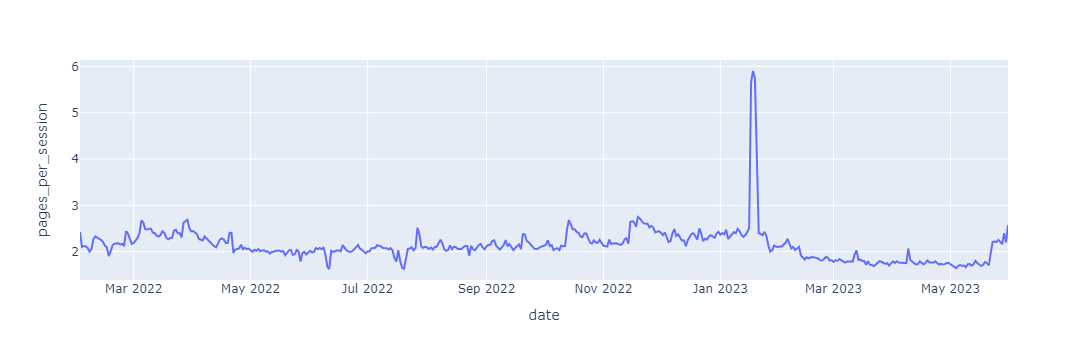

In [13]:
# grammys graph
px.line(grammys, x="date", y="pages_per_session")

In [15]:
# rec_academy graph
px.line(rec_academy, x="date", y="pages_per_session")

**D.** Looking at the 3 charts above, what can you say about the `pages_per_session` when the websites were combined versus after they were split?

It definitely seems like the pages per session slightly increased when the websites were split. Back when the site was combined it seems like people viewed an average of 1.5 pages per session. After the split, the Grammys website had people view an average of slightly over 2 pages per session and the Recording Academy website had people view an average of about 3 pages per session.

## Task 7

Bounce rate is another important metric for The Recording Academy. Bounce Rate is a measure of the percentage of visitors who come to the site and *never  interact with the website and leave*. In this task, you will define a function that takes in a dataframe as input and outputs the bounce rate.

**A.** Create a function called `bounce_rate` that:

1. Takes in a `dataframe` as input
2. adds up all of the values in the `bounced_sessions` column
3. adds up all of the values in the `sessions` column
4. returns the bounce rate as a percentage

In [16]:
def bounce_rate(dataframe):
    '''
    Calculates the bounce rate for visitors on the website.
    input: dataframe with bounced_sessions and sessions columns
    output: numeric value from bounce rate
    '''
    sum_bounced = dataframe['bounced_sessions'].sum()
    sum_sessions = dataframe['sessions'].sum()
    return 100 * (sum_bounced / sum_sessions)

**B.** Use the `frames` variable from Task 6 to loop over each website (represented by a dataframe) to calculate the bounce rate. Print the bounce rate for each site.

In [19]:
# Calculate the Bounce Rate for each site. Use the frames list you created in Task 6.
frame_name_list = ["Combined", "Grammys", "Recording Academy"]
bounce_rate_list = []
for frame in frames:
    bounce_rate_list.append(bounce_rate(frame))
    
for i, j in zip(frame_name_list, bounce_rate_list):
    print(f'The bounce rate for the {i} website is {j:0.2f}')

The bounce rate for the Combined website is 41.58
The bounce rate for the Grammys website is 40.16
The bounce rate for the Recording Academy website is 33.67


**C.** Another useful metric is how long on average visitors are staying on the website. 

Calculate the `mean` of the `avg_session_duration_secs` for each of the sites. 
Print each one using an f-string. 

In [20]:
# Calculate the average of the avg_session_duration_secs. Use the frames list you created in Task 6.
sd_cs = combined_site['avg_session_duration_secs'].mean()

sd_grammys = grammys['avg_session_duration_secs'].mean()

sd_tra = rec_academy['avg_session_duration_secs'].mean()

print(f"The mean session duration in seconds is {sd_cs:0.2f} for the combined site, {sd_grammys:0.2f} for the Grammys and {sd_tra:0.2f} for the Recording Academy.")

The mean session duration in seconds is 102.85 for the combined site, 82.99 for the Grammys and 128.50 for the Recording Academy.


**D.** What can you say about these two metrics as it relates to each of the websites?

The Recording Academy website has a bounce rate of 33.67% and a session duration 128.50 seconds, compared to the Grammys website having a bounce rate of 40.16% and a session duration of 82.99 seconds. This means that vsitors of the Recording Academy website, at least in comparison to the visitors of the Grammys website, tend to spend longer on the website and are less likely to click off the page without interacting with anything. The Recording Academy website therefore has overall better KPIs than the Grammys website.

# Part III - Demographics

![](https://media.giphy.com/media/GrUhLU9q3nyRG/giphy.gif)

Age demographics are a way to see which audience(s) your content is resonating with the most. This can inform marketing campaigns, ads, and much more.

Let's investigate the demographics for the two websites. This will require reading in two new files and joining them in python.

## Task 8

The `grammys_age_demographics.csv` and `tra_age_demographics.csv` each contain the following information:

- **age_group** - The age group range. e.g. `18-24` are all visitors between the ages of 18 to 24 who come to the site.
- **pct_visitors** - The percentage of all of the websites visitors that come from that specific age group.

**A.** Read in the `grammys_age_demographics.csv` and `tra_age_demograhics.csv` files.

In [21]:
# read in the files
age_grammys = pd.read_csv("datasets/grammys_age_demographics.csv")
age_tra = pd.read_csv("datasets/tra_age_demographics.csv")

In [22]:
# preview the grammys file. the tra file will look very similar.
age_grammys.head()

,age_group,pct_visitors
0,18-24,27.37
1,25-34,24.13
2,35-44,18.72
3,45-54,13.57
4,55-64,9.82


**B.** For each dataframe, create a new column called `website` whose value is the name of the website.
e.g. the `age_grammys` values for `website` should all be `Grammys` and for the `age_tra` they should be `Recording Academy`.

In [23]:
# create the website column
age_grammys['website'] = 'Grammys'
age_tra['website'] = 'Recording Academy'
age_grammys.head()

,age_group,pct_visitors,website
0,18-24,27.37,Grammys
1,25-34,24.13,Grammys
2,35-44,18.72,Grammys
3,45-54,13.57,Grammys
4,55-64,9.82,Grammys


**C.** Join these two datasets together.

In [24]:
#join the two datasets
age_combined = pd.concat([age_grammys, age_tra])
age_combined.shape

(12, 3)

**D.** Create a bar chart of the `age_group` and `pct_visitors`. This chart should have, for each age group, one color for the Recording Academy and a different color for the Grammys.

In [25]:
# Create bar chart
px.bar(age_combined, x='age_group', y='pct_visitors', color='website', barmode='group')

**E.** Looking at the chart above, what can you say about how the age demographics differ between the two websites?

The age demographics between the two websites are pretty similar to each other for the most part. The difference between the percentage of visitors within each age group is about 2 percent or less, meaning that each website has about the same porportion of each age group browsing the site. In the 55-64 group and the 65+ group they seem to prefer the Grammys website over the Recording Academy website by just a little, but not significantly enough to make a huge impact. Most users seem to be in the 18-24 and 25-34 age groups with older users making up a smaller percentage of the site's traffic. So overall we can say that the users of these sites tend to be on the younger side and each site has a similar user age demographic.

# Part IV - Recommendation
![](https://media.giphy.com/media/0Av9l0VIc01y1isrDw/giphy.gif)

## Task 9

Using the work you did in this project, would you recommend that the websites stay separate? Please give a 3 paragraph answer using details from the analysis work above explaining why or why not they should stay separate.

While the demographics section in Task 8 does show that both websites have similar user age demographics, I think that some of the other data we've discoverved in this project would actually support the idea that the websites should stay separate. I say this because it seems like the users use the Recording Academy website a bit differently than they use the Grammys website, and we want to keep the websites separate if they're serving different purposes. The first set of data that made me come to this conclusion is the average number of page views per session that we found in Task 6. When users browse the Grammys website they view an average of 2 pages per session while for the Recording Academy website they view an average of 3 pages per session, meaning that users who do click on the Recording Academy website tend to browse on it more than the Grammys website.

The information in Task 7 also supports the idea that people use the Recording Academy website differently than the Grammys website. Take the bounce rate as an example. The bounce rate for the Grammys website is 40.16% while the bounce rate for the Recording Academy Website is 33.67%, which is a nearly 7% difference. This means that less people leave the Recording Academy website without interacting with anything. The mean session duration for the Grammys website is 82.99 seconds while it's 128.50 seconds for the Recording Academy website, which is a huge difference of over 40 seconds between the two. This means that people are spending more time on the Recording Academy website compared to the Grammys website.

What could possibly be happening here is that the Grammys website is being viewed by more casual fans while the Recording Academy website is being viewed by people that care a bit more about the show and want to keep up with the academy's proceedings. I believe this because if you compare the values of the two separate websites to the combined website, the Grammys website values tend to stay similar or get worse while the Recording Academy website values improve. Take the mean session duration as an example: it was 102.85 for the combined site, 82.99 for the Grammys site and 128.50 for the Recording Academy. In the past people would have to visit the same website regardless of how seriously they took the awards, leading to the 102.85 second mean duration. Now that they're separate though you can see that it was likely people viewing Recording Academy news that were hiking up the average, while more casual fans were dragging down the average. Taking all of this into consideration, I would say that keeping the websites separate would be better; the Grammys website serves more casual fans of the award show while the Recording Academy website serves more dedicated ones.

# LevelUp
![](https://media.giphy.com/media/6fUIhrlrHCzEHvY8oF/giphy.gif)

Ray and Harvey are both interested to see how the Grammys.com website compares to that of their main music award competitor, The American Music Awards (AMA). The dashboard below is aggregated information about the performace of The AMA website for the months of April, May, and June of 2023.

Your task is to determine how the Grammys website is performing relative to The AMA website. In particular, you will be looking at the device distribution and total visits over the same time span and leveraging information about Visit Duration, Bounce Rate, and Pages / Visit from your work in the core of this project.

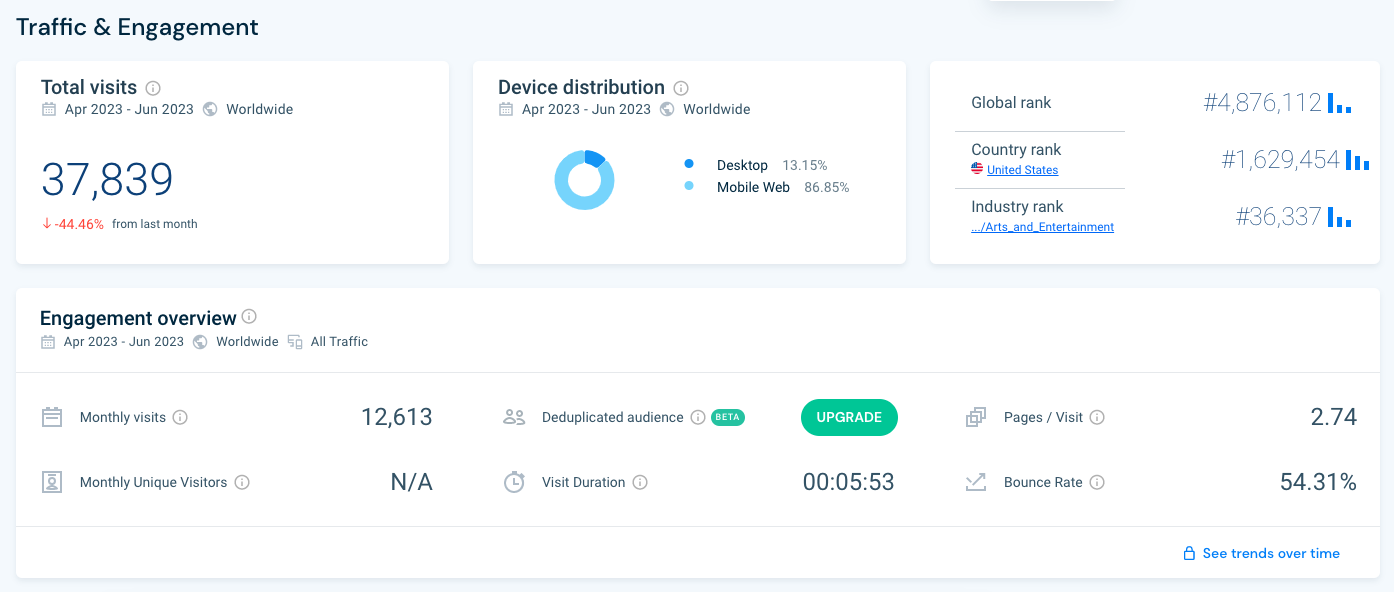

Let's review some of the content from above.

The **Total Visits** column is the total number of visitors on the website during the timespan given.
The **Device Distribution** is the percentage share of visitors coming from Desktop users (PCs, Macs, etc.) and Mobile Users (iPhone, Android, etc.).

**A.** Load in the two files. The `desktop_users.csv` and `mobile_users.csv` files contain the users coming from desktop users and mobile users respectively.

In [26]:
# Load in the data
desktop_users = pd.read_csv("datasets/desktop_users.csv")
mobile_users = pd.read_csv("datasets/mobile_users.csv")

In [27]:
# preview the desktop_users file
desktop_users.head()

,date,segment,visitors
0,2022-02-01,Desktop Traffic,10195
1,2022-02-02,Desktop Traffic,10560
2,2022-02-03,Desktop Traffic,9935
3,2022-02-04,Desktop Traffic,8501
4,2022-02-05,Desktop Traffic,5424


In [28]:
# preview mobile_users file
mobile_users.head()

,date,segment,visitors
0,2022-02-01,Mobile Traffic,23494
1,2022-02-02,Mobile Traffic,20234
2,2022-02-03,Mobile Traffic,22816
3,2022-02-04,Mobile Traffic,18592
4,2022-02-05,Mobile Traffic,13298


**B.** For each dataframe, change the name of the `visitors` column so that it says which category they come from. For example, the `desktop_users` dataframe should have a column named `desktop_visitors` instead of `visitors`.

Additionally, drop the `segment` column since it is no longer needed.

In [29]:
# change name of the visitors column to indicate which category it comes from
desktop_users = desktop_users.rename(columns={'visitors':'desktop_visitors'})
mobile_users = mobile_users.rename(columns={'visitors':'mobile_visitors'})
mobile_users.head()

,date,segment,mobile_visitors
0,2022-02-01,Mobile Traffic,23494
1,2022-02-02,Mobile Traffic,20234
2,2022-02-03,Mobile Traffic,22816
3,2022-02-04,Mobile Traffic,18592
4,2022-02-05,Mobile Traffic,13298


In [27]:
# drop the segment column from each dataframe
desktop_users = desktop_users.drop(columns=['segment'])
mobile_users = mobile_users.drop(columns=['segment'])
mobile_users.head()

,date,mobile_visitors
0,2022-02-01,23494
1,2022-02-02,20234
2,2022-02-03,22816
3,2022-02-04,18592
4,2022-02-05,13298


**C.** Join the two dataframes together in a new variable called `segment_df`.

In [30]:
# join the two dataframes and preview the dataframe
segment_df = desktop_users.merge(mobile_users, on="date")
segment_df.head()

,date,segment_x,desktop_visitors,segment_y,mobile_visitors
0,2022-02-01,Desktop Traffic,10195,Mobile Traffic,23494
1,2022-02-02,Desktop Traffic,10560,Mobile Traffic,20234
2,2022-02-03,Desktop Traffic,9935,Mobile Traffic,22816
3,2022-02-04,Desktop Traffic,8501,Mobile Traffic,18592
4,2022-02-05,Desktop Traffic,5424,Mobile Traffic,13298


**D.** In the next few steps, you will calculate the percentage share of users coming from desktop and mobile on the Grammys website.

Calculate a new column, `total_visitors` that is the addition of `desktop_visitors` and `mobile_visitors`. 

In [32]:
# create total_visitors column
segment_df['total_visitors'] = segment_df['desktop_visitors'] + segment_df['mobile_visitors']
segment_df.head()

,date,segment_x,desktop_visitors,segment_y,mobile_visitors,total_visitors
424,2023-04-01,Desktop Traffic,2790,Mobile Traffic,9596,12386
425,2023-04-02,Desktop Traffic,2295,Mobile Traffic,7092,9387
426,2023-04-03,Desktop Traffic,6519,Mobile Traffic,11134,17653
427,2023-04-04,Desktop Traffic,6701,Mobile Traffic,11577,18278
428,2023-04-05,Desktop Traffic,6310,Mobile Traffic,10639,16949


To calculate the percentage share you will first need to filter the data to dates after (and including) `2023-04-01`. Then calculate the `sum` of desktop visitors and total visitors and divide those values.

In [33]:
# filter and calculate the percentage share
segment_df = segment_df[segment_df['date'] >= '2023-04-01']
desktop_ps = sum(segment_df['desktop_visitors']) / sum(segment_df['total_visitors']) * 100
total_vis = sum(segment_df['total_visitors'])
print(f'Desktop percent share is {desktop_ps:0.2f}% and mobile percent share is {100-desktop_ps:0.2f}%')
print(f'The total number of visitors is {total_vis}')

Desktop percent share is 31.84% and mobile percent share is 68.16%
The total number of visitors is 1428482


**What is the percentage share of desktop and mobile visitors on the Grammys website in the timeframe in question?** **What is the total number of visitors on the site during this timeframe?**

The percentage share of desktop and mobile visitors for the Grammyss website is 31.84% for desktop and 68.16% for mobile, showing that mobile seems to be the favored browsing method for visitors. The total number of visitors from the date 2023-04-01 and later was 1,428,482.

**E.** How is the Grammys website performing relative to its competitor? What is the Grammys doing well and what KPIs does it need to improve? 

The Grammys website is performing better in multiple aspects relative to the AMAs website. Looking at the same timeframe for both websites (April 2023 and later), The Grammys website had over 1.4 million visitors compared to the AMAs website that got just under 38,000 visitors. The Grammys website has a bounce rate of 40.16% while the AMAs website has a 54.31% bounce rate. Another interesting thing to note is that the Grammys website has a desktop percent share of 31.84% while the AMAs website has a desktop percent share of 13.15%.

There are a couple KPIs that the AMAs website beats out the Grammys website in. The most prominent one is visit duration. Visitors to the AMAs website have an average 5 minute and 53 second visit duration while the Grammys has a 82.99 second visit duration, which is about 1 minute and 23 seconds. That's a huge visit duration disparity. The Grammys website also has a pages per visit average of about 2 while the AMAs website has a pages per visit average of 2.74. To remain competitive, the Grammys should look into ways to increase the user's page views per visit and visit duration.